In [99]:
import glob

all_files = glob.glob("csv/*.csv")

ls = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    ls.append(df)
df = pd.concat(ls, axis=0, ignore_index=True)
df

,model,mark,price,group,other
0,AMD Ryzen Threadripper 3990X,80340,3799.79,cpu,NaN
1,AMD Ryzen Threadripper 3970X,64362,1998.99,cpu,NaN
2,AMD Ryzen Threadripper 3960X,55512,1349.98,cpu,NaN
3,AMD Ryzen 9 3950X,39277,709.99,cpu,NaN
4,Intel Core i9-10980XE @ 3.00GHz,34138,1019.00,cpu,NaN
...,...,...,...,...,...
1028,GeForce GTX 285,1555,179.99,gpu,NaN
1029,GeForce GT 740,1544,154.32,gpu,NaN
1030,FirePro W4100,1508,149.86,gpu,NaN
1031,Radeon HD 4890,1499,109.99,gpu,NaN


In [100]:
df['group'].unique()

array(['cpu', 'hard-drive', 'ram', 'gpu'], dtype=object)

In [101]:
df.dtypes

model     object
mark       int64
price    float64
group     object
other    float64
dtype: object

#### one-hot-encoding

In [102]:
df_one = pd.get_dummies(df['group'])

In [103]:
df_one

,cpu,gpu,hard-drive,ram
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1028,0,1,0,0
1029,0,1,0,0
1030,0,1,0,0
1031,0,1,0,0


In [104]:
df = pd.merge(df, df_one, left_index = True, right_index = True)

In [105]:
df

,model,mark,price,group,other,cpu,gpu,hard-drive,ram
0,AMD Ryzen Threadripper 3990X,80340,3799.79,cpu,NaN,1,0,0,0
1,AMD Ryzen Threadripper 3970X,64362,1998.99,cpu,NaN,1,0,0,0
2,AMD Ryzen Threadripper 3960X,55512,1349.98,cpu,NaN,1,0,0,0
3,AMD Ryzen 9 3950X,39277,709.99,cpu,NaN,1,0,0,0
4,Intel Core i9-10980XE @ 3.00GHz,34138,1019.00,cpu,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1028,GeForce GTX 285,1555,179.99,gpu,NaN,0,1,0,0
1029,GeForce GT 740,1544,154.32,gpu,NaN,0,1,0,0
1030,FirePro W4100,1508,149.86,gpu,NaN,0,1,0,0
1031,Radeon HD 4890,1499,109.99,gpu,NaN,0,1,0,0


In [106]:
cpu_df = df[df['group'] == 'cpu']
cpu_df.price.describe()

count     137.000000
mean      382.301314
std       512.338194
min        38.000000
25%       143.000000
50%       234.990000
75%       409.990000
max      3799.790000
Name: price, dtype: float64

In [107]:
cpu_df = df[df['group'] == 'gpu']
cpu_df.price.describe()

count     188.000000
mean      558.810745
std      1027.776370
min        35.990000
25%       147.990000
50%       239.990000
75%       489.785000
max      8999.000000
Name: price, dtype: float64

In [108]:
cpu_df = df[df['group'] == 'ram']
cpu_df.price.describe()

count     648.000000
mean      200.530525
std       250.664203
min        13.820000
25%        75.212500
50%       133.980000
75%       231.277500
max      2752.300000
Name: price, dtype: float64

In [109]:
cpu_df = df[df['group'] == 'hard-drive']
cpu_df.price.describe()

count      60.000000
mean      279.943500
std       250.723996
min        53.230000
25%       145.822500
50%       194.655000
75%       352.490000
max      1534.960000
Name: price, dtype: float64

In [110]:
# 평균값으로 일단 진행
# 각 그룹당 평균 가격 : cpu : 382.3 / gpu : 558.8 / ram : 200.5 / hard : 279.9
# 각 그룹의 비율

In [111]:
df.pivot_table(index = 'group', values = 'price', aggfunc='mean')

,price
group,
cpu,382.301314
gpu,558.810745
hard-drive,279.943500
ram,200.530525


In [112]:
# 평균가격의 총합
df.pivot_table(index = 'group', values = 'price', aggfunc='mean').sum()

price    1421.586083
dtype: float64

In [113]:
## 총합에서 group 별 차지하는 비율
mean = round((df.pivot_table(index = 'group', values = 'price', aggfunc='mean')/df.pivot_table(index = 'group', values = 'price', aggfunc='mean').sum()), 4)
mean*100

,price
group,
cpu,26.89
gpu,39.31
hard-drive,19.69
ram,14.11


In [114]:
# 일단 기준을 평균으로 해서 가는거고
# 이제 가격을 입력해서 그 가격을 기준으로 해당 비율만큼 나누어 할당하고, 그 가격과 가장 가까운 거리의 부품을 추천해주는 시스템을 만들면 되지 않을까?

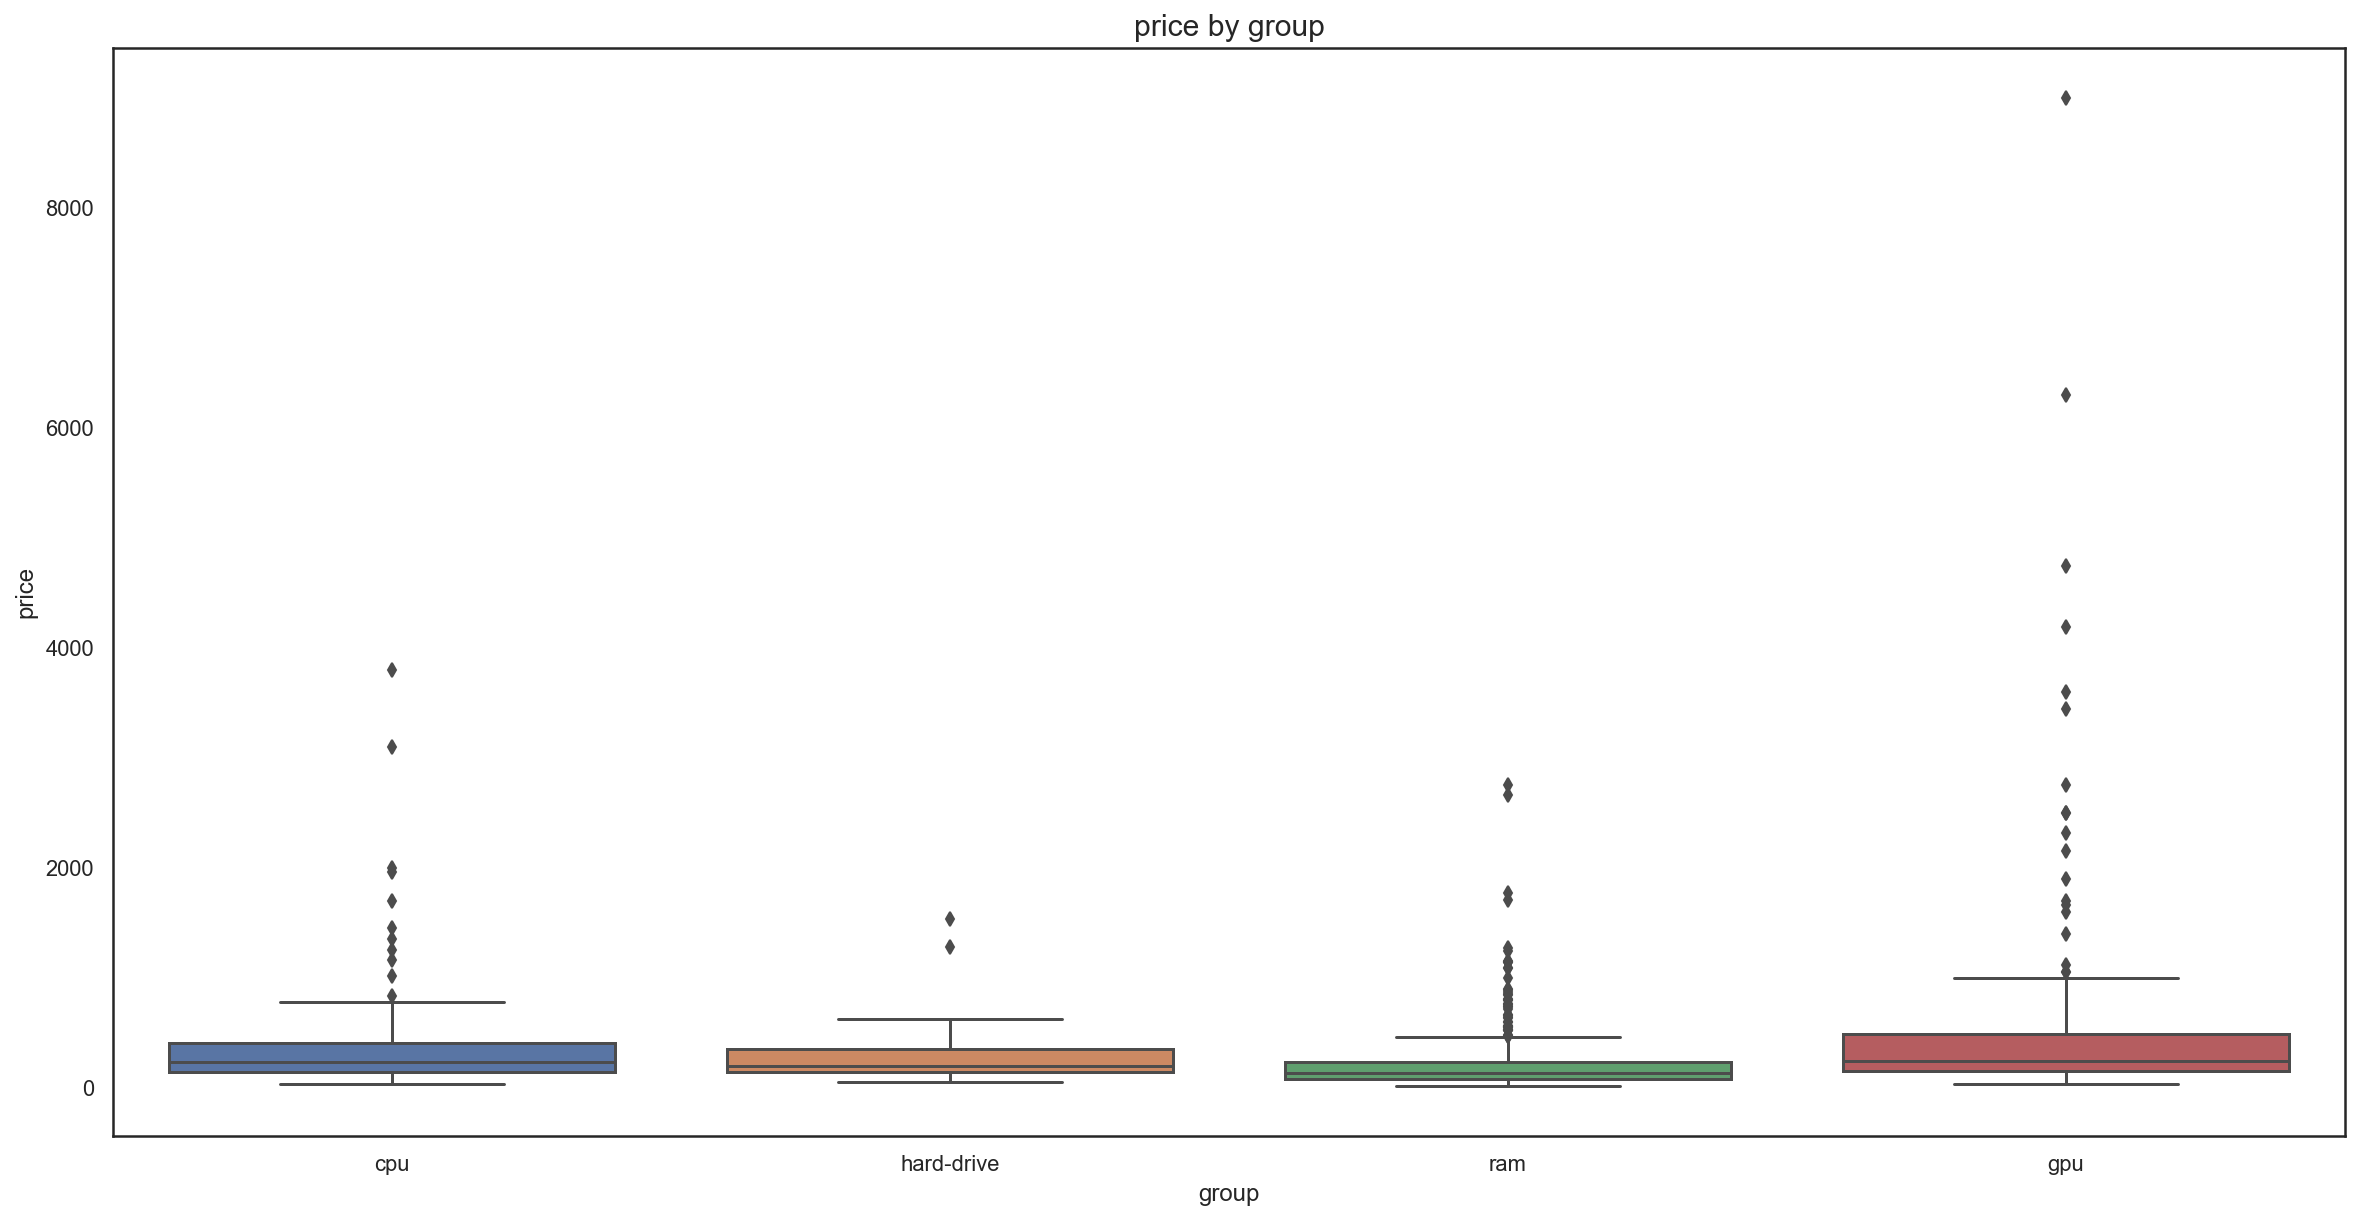

In [115]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="group", y="price");
plt.title("price by group", fontsize=15)
plt.show()

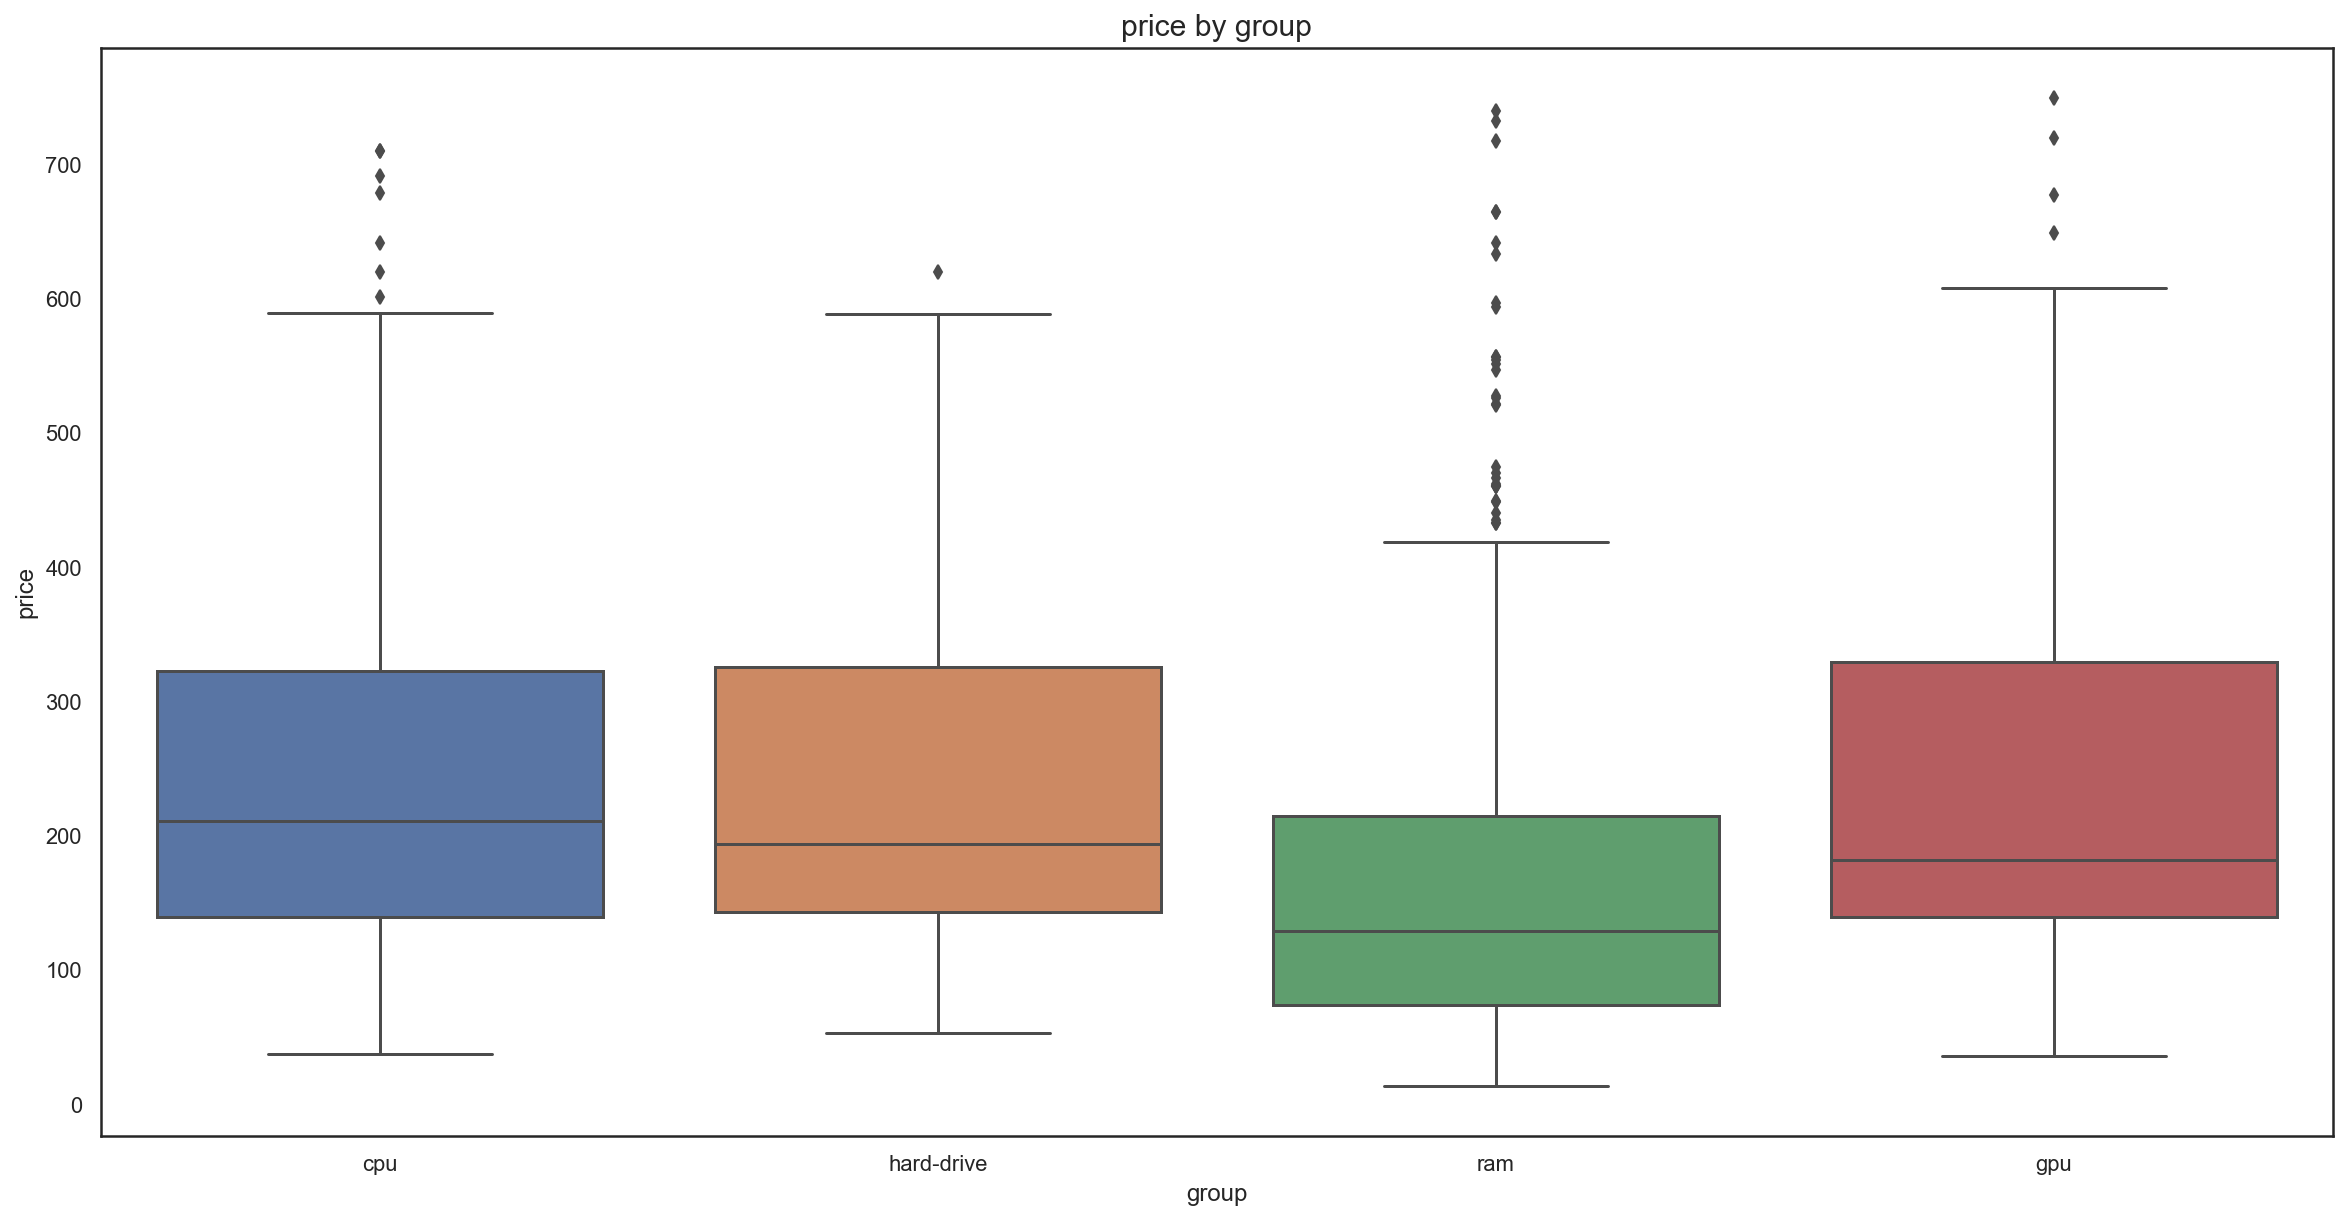

In [116]:
df1 = df[df['price']<=750]
df1
plt.figure(figsize=(20,10))
sns.boxplot(data=df1, x="group", y="price");
plt.title("price by group", fontsize=15)
plt.show()

In [123]:
df.group.unique()[3]

'gpu'

In [127]:
money = int(input('가격을 입력하시오 : '))
ram = int(input('ram 최소용량을 입력하시오(상관 없을 시, 0을 입력하시오) : '))
hard = int(input('hard 최소용량을 입력하시오(상관 없을 시, 0을 입력하시오) : '))
datas=[]

if hard == 0 and ram == 0:
    for i in range(0, len(df.group.unique())):
        group_df = None
        group_df = df[(df['price'] <= money*mean.iloc[i].price) & (df['group'] == df.group.unique()[i])]
        group_df.sort_values(by='price', ascending=False, inplace=True)
        datas.append(group_df.head(1))
else:
    for i in range(0, len(df.group.unique())):
        if i == 0 or 3:
            group_df = None
            group_df = df[(df['price'] <= money*mean.iloc[i].price) & (df['group'] == df.group.unique()[i])]
            group_df.sort_values(by='price', ascending=False, inplace=True)
            datas.append(group_df.head(1))
        else:
            group_df = df[(df['price'] <= money*mean.iloc[i].price) & (df['group'] == df.group.unique()[i]) & (df['other'] >= hard) & (df['other'] >= hard)]
            group_df = None
            group_df.sort_values(by='price', ascending=False, inplace=True)
            datas.append(group_df.head(1))

    
recom_df = pd.concat(datas, axis=0, ignore_index=True)
print('총 가격 : {}달러'.format(recom_df.price.sum()))
recom_df    

가격을 입력하시오 : 700
ram 최소용량을 입력하시오(상관 없을 시, 0을 입력하시오) : 0
hard 최소용량을 입력하시오(상관 없을 시, 0을 입력하시오) : 0
총 가격 : 690.5달러


,model,mark,price,group,other,cpu,gpu,hard-drive,ram
0,Intel Core i5-10400F @ 2.90GHz,12740,187.99,cpu,NaN,1,0,0,0
1,Viper M.2 VPN100 2TB,23607,274.99,hard-drive,2048.0,0,0,1,0
2,ESSENCORE KLEVV DDR4-3600 CL18 BOLT X 패키지,3600,137.53,ram,32.0,0,0,0,1
3,Radeon R7 260,2891,89.99,gpu,NaN,0,1,0,0


In [81]:
round(df.pivot_table(index = 'group', values = 'mark', aggfunc='mean'), 0)

,mark
group,
cpu,14307.0
gpu,6685.0
hard-drive,26582.0
ram,3207.0
